In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from zipfile import ZipFile
from urllib.request import urlopen
import os


In [5]:
os.remove("MT_COR_Database.xlsx")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'MT_COR_Database.xlsx'

In [8]:
from selenium import webdriver
import webbrowser
import time

chrome_options = webdriver.ChromeOptions()
prefs = {'download.default_directory' : 'C:\\Users\sebas\School_stuff\DS Projects\Emily Proj'}
chrome_options.add_experimental_option('prefs', prefs)
driver = webdriver.Chrome(chrome_options=chrome_options)

driver.get("https://dataportal.mt.gov/t/COR/views/PublicDatabaseDownload_16243742104110/Download?:showAppBanner=false&:display_count=n&:showVizHome=n&:origin=viz_share_link&%3AisGuestRedirectFromVizportal=y&%3Aembed=y")

time.sleep(45)
# Obtain button by Xpath and click.
driver.switch_to.frame(0)
driver.find_element_by_xpath('//*[@id="root"]/div/button').click()
time.sleep(30)
driver.close()

C:\Users\sebas\AppData\Local\Temp/ipykernel_22732/2373981850.py:8: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)
C:\Users\sebas\AppData\Local\Temp/ipykernel_22732/2373981850.py:15: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  driver.find_element_by_xpath('//*[@id="root"]/div/button').click()


In [9]:
data=pd.read_excel('MT_COR_Database.xlsx',sheet_name=['Offender Demographics','Offender Names','Offender Legal'])

In [10]:
demo=data['Offender Demographics']
names=data['Offender Names']
legal=data['Offender Legal']

In [11]:
demo_v_legal = pd.merge(demo, legal, on='DOC_ID')
demo_v_legal.columns

Index(['DOC_ID', 'SEX', 'RACE', 'BIRTH_YEAR', 'BIRTH_STATE', 'CITIZENSHIP',
       'HEIGHT', 'WEIGHT', 'HANDEDNESS', 'HAIR_COLOR', 'BUILD', 'SKIN_TONE',
       'EYE_COLOR', 'CORRECTIONAL_STATUS', 'STATUS_START_DATE',
       'LOCATION_NAME', 'LOCATION_ADDRESS', 'LOCATION_PHONE',
       'MONTANA_RESIDENT', 'PROJECTED_DOC_EXPIRATION', 'LAST_UPDATED_x',
       'DOCKET', 'COUNTS', 'LEGAL_TYPE', 'OFFENSE_CODE',
       'TOTAL_SENTENCED_MONTHS', 'SENTENCE_TYPE', 'OFFENSE', 'JUDGE', 'COUNTY',
       'OFFENSE_DATE', 'PRONOUNCEMENT_DATE', 'LAST_UPDATED_y'],
      dtype='object')

In [12]:
demo_v_legal.head()

,DOC_ID,SEX,RACE,BIRTH_YEAR,BIRTH_STATE,CITIZENSHIP,HEIGHT,WEIGHT,HANDEDNESS,HAIR_COLOR,...,LEGAL_TYPE,OFFENSE_CODE,TOTAL_SENTENCED_MONTHS,SENTENCE_TYPE,OFFENSE,JUDGE,COUNTY,OFFENSE_DATE,PRONOUNCEMENT_DATE,LAST_UPDATED_y
0,10004,M,White,1957,Montana,United States,5 FT 10 IN,150,RIGHT,Brown,...,Original Sentence,618731,60.0,DOC Commit None Suspended,DUI-Excess Alc Conc-4th or Subseq Off,Rieger,Dawson,12/19/2017,5/15/2018,5/6/2022 12:26:51 AM
1,10004,M,White,1957,Montana,United States,5 FT 10 IN,150,RIGHT,Brown,...,Original Sentence,459103,60.0,MSP/MWP All Suspended,Criminal Possession with Intent to Distribute,Cox,Dawson,3/20/1997,12/15/1997,5/6/2022 12:27:11 AM
2,10004,M,White,1957,Montana,United States,5 FT 10 IN,150,RIGHT,Brown,...,Probation Violation Sentence,455503,120.0,MSP/MWP None Suspended,Sexual Intercourse without Consent,Mc Donough Rc,Dawson,1/5/1987,2/10/1987,5/6/2022 12:27:12 AM
3,10004,M,White,1957,Montana,United States,5 FT 10 IN,150,RIGHT,Brown,...,Probation Violation Sentence,618731,60.0,MSP/MWP None Suspended,DUI-Excess Alc Conc-4th or Subseq Off,Simonton,Dawson,11/19/2002,6/21/2004,5/6/2022 12:27:09 AM
4,10004,M,White,1957,Montana,United States,5 FT 10 IN,150,RIGHT,Brown,...,Probation Violation Sentence,459101,120.0,DOC Commit None Suspended,Criminal Distribution of Dangerous Drugs,Day,Custer,2/11/2010,2/26/2016,5/6/2022 12:26:57 AM


In [13]:
clean_data=demo_v_legal.drop(['BUILD',
                              'STATUS_START_DATE',
                              'DOC_ID',
                              'HEIGHT',
                              'WEIGHT',
                              'LOCATION_NAME',
                              'DOCKET',
                              'BIRTH_STATE',
                              'HANDEDNESS',
                              'HAIR_COLOR',
                              'SKIN_TONE',
                              'EYE_COLOR',
                              'LOCATION_ADDRESS',
                              'LOCATION_PHONE',
                              'PROJECTED_DOC_EXPIRATION',
                              'LAST_UPDATED_x',
                              'LAST_UPDATED_y'], axis=1)

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.ensemble import RandomForestRegressor 
set_config(display='diagram')

In [15]:
clean_data['AGE']= 2022-clean_data.BIRTH_YEAR
clean_data['AGE']
clean_data.drop('BIRTH_YEAR',axis=1,inplace=True)
clean_data.OFFENSE_DATE=pd.to_datetime(clean_data.OFFENSE_DATE,errors='coerce').dropna()
clean_data.PRONOUNCEMENT_DATE=pd.to_datetime(clean_data.PRONOUNCEMENT_DATE,errors='coerce').dropna()
clean_data=clean_data[clean_data.OFFENSE_DATE>'1960-01-01']
#clean_data=clean_data.set_index('OFFENSE_DATE').sort_index()#

In [16]:
clean_data.isna().sum()

SEX                         0
RACE                        0
CITIZENSHIP                 0
CORRECTIONAL_STATUS         0
MONTANA_RESIDENT            0
COUNTS                      0
LEGAL_TYPE                  0
OFFENSE_CODE                0
TOTAL_SENTENCED_MONTHS    666
SENTENCE_TYPE               0
OFFENSE                     0
JUDGE                       0
COUNTY                      0
OFFENSE_DATE                0
PRONOUNCEMENT_DATE         64
AGE                         0
dtype: int64

In [17]:
clean_data=clean_data.dropna()

In [18]:
clean_data.shape

(39017, 16)

In [19]:
clean_data.head()


,SEX,RACE,CITIZENSHIP,CORRECTIONAL_STATUS,MONTANA_RESIDENT,COUNTS,LEGAL_TYPE,OFFENSE_CODE,TOTAL_SENTENCED_MONTHS,SENTENCE_TYPE,OFFENSE,JUDGE,COUNTY,OFFENSE_DATE,PRONOUNCEMENT_DATE,AGE
0,M,White,United States,Conditional Release,Y,1,Original Sentence,618731,60.0,DOC Commit None Suspended,DUI-Excess Alc Conc-4th or Subseq Off,Rieger,Dawson,2017-12-19,2018-05-15,65
1,M,White,United States,Conditional Release,Y,1,Original Sentence,459103,60.0,MSP/MWP All Suspended,Criminal Possession with Intent to Distribute,Cox,Dawson,1997-03-20,1997-12-15,65
2,M,White,United States,Conditional Release,Y,1,Probation Violation Sentence,455503,120.0,MSP/MWP None Suspended,Sexual Intercourse without Consent,Mc Donough Rc,Dawson,1987-01-05,1987-02-10,65
3,M,White,United States,Conditional Release,Y,2,Probation Violation Sentence,618731,60.0,MSP/MWP None Suspended,DUI-Excess Alc Conc-4th or Subseq Off,Simonton,Dawson,2002-11-19,2004-06-21,65
4,M,White,United States,Conditional Release,Y,1,Probation Violation Sentence,459101,120.0,DOC Commit None Suspended,Criminal Distribution of Dangerous Drugs,Day,Custer,2010-02-11,2016-02-26,65


In [20]:
sentence_values=clean_data.TOTAL_SENTENCED_MONTHS.value_counts()
sentence_values.sort_index(ascending=False)

11988.0     6
3600.0      1
2400.0      1
2160.0      1
1800.0     70
           ..
4.0         3
3.0         6
2.0         5
1.0         3
0.0        46
Name: TOTAL_SENTENCED_MONTHS, Length: 179, dtype: int64

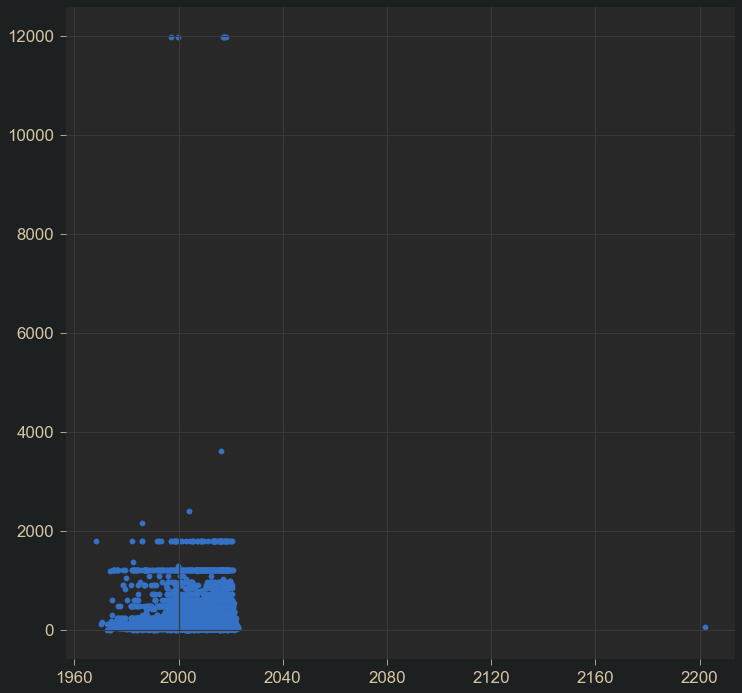

In [21]:
plt.scatter(clean_data.OFFENSE_DATE,clean_data.TOTAL_SENTENCED_MONTHS)

In [22]:
clean_data=clean_data[clean_data.TOTAL_SENTENCED_MONTHS<3500]

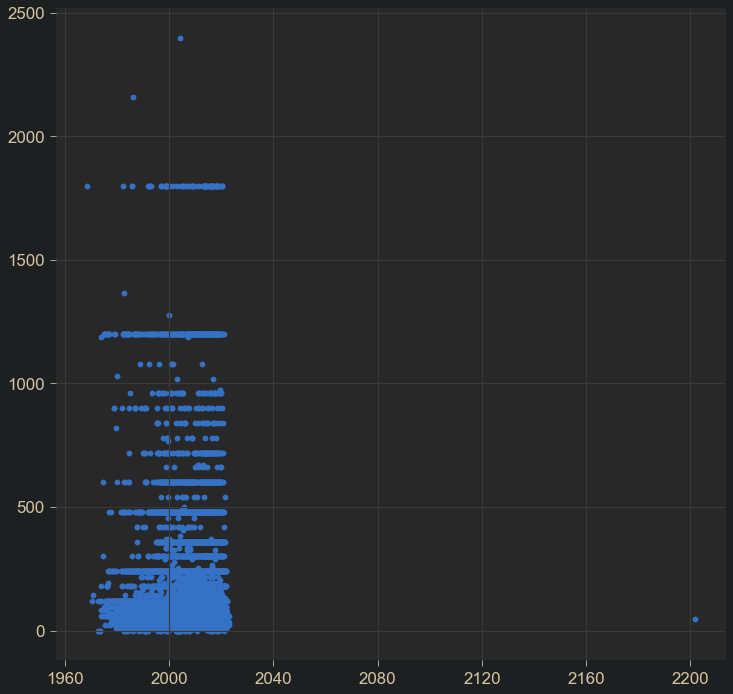

In [23]:
plt.scatter(clean_data.OFFENSE_DATE,clean_data.TOTAL_SENTENCED_MONTHS)

Add current givenor feature and maybe normalize by population

<AxesSubplot:>

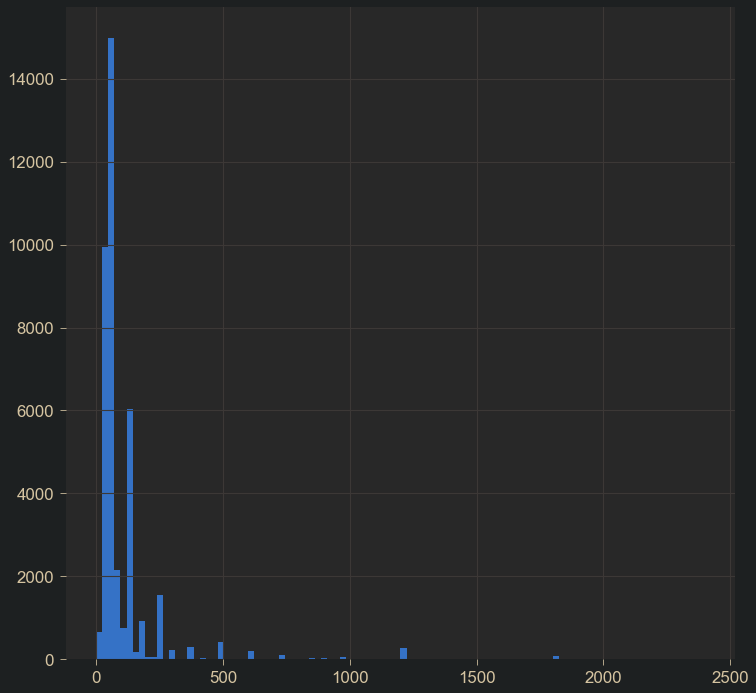

In [24]:
clean_data.TOTAL_SENTENCED_MONTHS.hist(bins=100)

<AxesSubplot:>

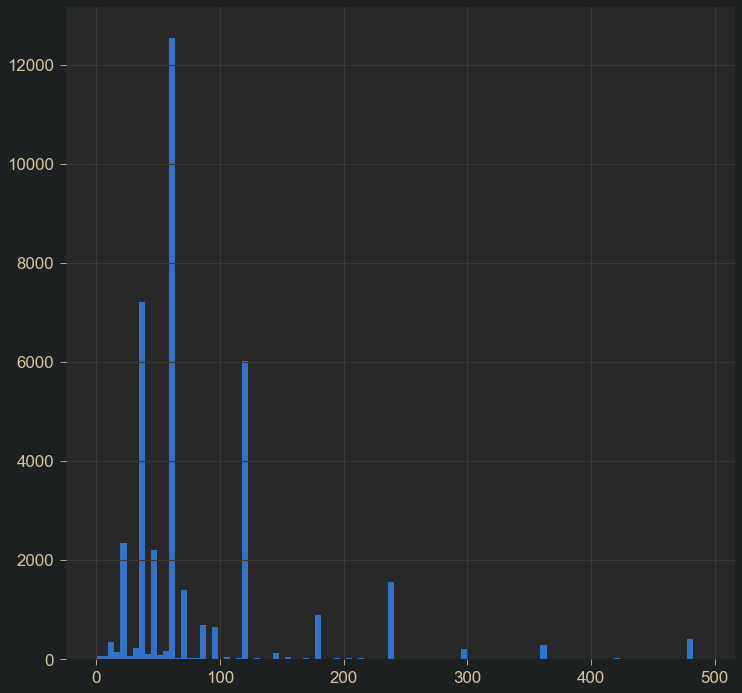

In [25]:
vis_data=clean_data[clean_data.TOTAL_SENTENCED_MONTHS<500]
vis_data.TOTAL_SENTENCED_MONTHS.hist(bins=100)

In [26]:


clean_data['Offense_Day']=clean_data.OFFENSE_DATE.dt.day
clean_data['Offense_Day_Week']= clean_data.OFFENSE_DATE.dt.dayofweek
clean_data['Offense_Month']=clean_data.OFFENSE_DATE.dt.month
clean_data['Offense_Year']=clean_data.OFFENSE_DATE.dt.year

clean_data['Sentence_Day']= clean_data.PRONOUNCEMENT_DATE.dt.day
clean_data['Sentence_Day_of_Week']= clean_data.PRONOUNCEMENT_DATE.dt.dayofweek
clean_data['Sentence_Month']=clean_data.PRONOUNCEMENT_DATE.dt.month
clean_data['Sentence_Year']=clean_data.PRONOUNCEMENT_DATE.dt.year

clean_data.set_index('OFFENSE_DATE')
clean_data.drop('PRONOUNCEMENT_DATE',axis=1,inplace=True)

In [27]:
clean_data.columns

Index(['SEX', 'RACE', 'CITIZENSHIP', 'CORRECTIONAL_STATUS', 'MONTANA_RESIDENT',
       'COUNTS', 'LEGAL_TYPE', 'OFFENSE_CODE', 'TOTAL_SENTENCED_MONTHS',
       'SENTENCE_TYPE', 'OFFENSE', 'JUDGE', 'COUNTY', 'OFFENSE_DATE', 'AGE',
       'Offense_Day', 'Offense_Day_Week', 'Offense_Month', 'Offense_Year',
       'Sentence_Day', 'Sentence_Day_of_Week', 'Sentence_Month',
       'Sentence_Year'],
      dtype='object')

In [28]:
clean_data.to_csv('clean_corrections.csv')

In [29]:
y=clean_data.TOTAL_SENTENCED_MONTHS
X=clean_data.drop('TOTAL_SENTENCED_MONTHS',axis=1)
cat_features=['SEX',
              'RACE',
              'CITIZENSHIP',
              'CORRECTIONAL_STATUS',
              'MONTANA_RESIDENT',
              'LEGAL_TYPE',
              'OFFENSE_CODE',
              'SENTENCE_TYPE',
              'OFFENSE',
              'JUDGE',
              'COUNTY',
              'Offense_Day',
              'Offense_Day_Week',
              'Offense_Month',
              'Offense_Year',
              'Sentence_Day',
              'Sentence_Day_of_Week',
              'Sentence_Month',
              'Sentence_Year',
             ]


num_features=['AGE',
              'COUNTS'
             ]


processor=ColumnTransformer(transformers=[
    ('cat_processor',OneHotEncoder(handle_unknown='ignore'),cat_features),
    ('num_processor',MinMaxScaler(),num_features),
])

pipe=Pipeline(steps=[
    ('preprocessor',processor),
    ('reg',RandomForestRegressor())
])

In [30]:
features=X.columns
X.shape

(39010, 22)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y)

In [32]:
xtrain, x_val, ytrain, y_val=train_test_split(x_train,y_train)

In [33]:
xtrain.shape

(21942, 22)

In [34]:
pipe.fit(xtrain,ytrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['SEX', 'RACE', 'CITIZENSHIP',
                                                   'CORRECTIONAL_STATUS',
                                                   'MONTANA_RESIDENT',
                                                   'LEGAL_TYPE', 'OFFENSE_CODE',
                                                   'SENTENCE_TYPE', 'OFFENSE',
                                                   'JUDGE', 'COUNTY',
                                                   'Offense_Day',
                                                   'Offense_Day_Week',
                                                   'Offense_Month',
                                                   'Offense_Year',
                                                   'Sentence_Day',
                                                   'Sentence_Day_of_Week',
                                                   'Sentence_Month',
                                                   'Sentence_Year']),
                                                 ('num_processor',
                                                  MinMaxScaler(),
                                                  ['AGE', 'COUNTS'])])),
                ('reg', RandomForestRegressor())])

In [35]:
pipe['reg'].feature_importances_.shape
cat=list(pipe['preprocessor'].named_transformers_['cat_processor'].get_feature_names_out(cat_features))
feature_names=cat+num_features

In [36]:
importances=pd.DataFrame(data= pipe['reg'].feature_importances_,index=feature_names, columns=['coefficient'])

<AxesSubplot:>

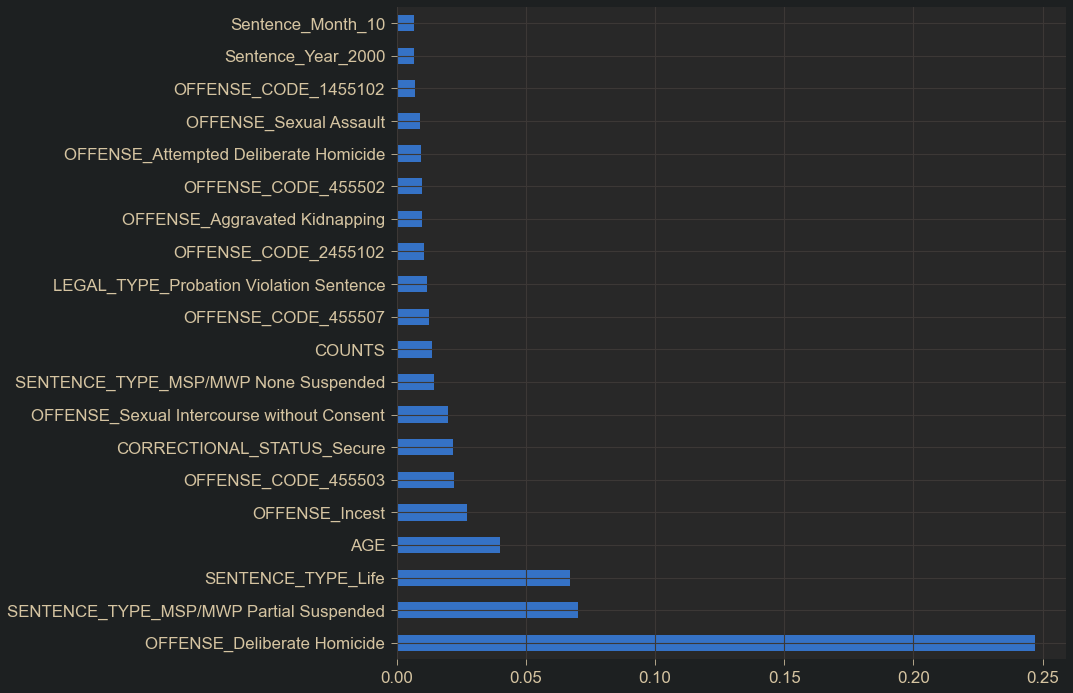

In [37]:
importances.coefficient.sort_values(ascending=False).head(20).plot.barh()

In [38]:
y_val_pred=pipe.predict(x_val)

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
np.sqrt(mean_squared_error(y_val,y_val_pred))

86.10819219191605

In [41]:
y_test_pred=pipe.predict(x_test)

In [42]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

95.9946159122545

In [43]:
##unsupervised Clustering/PCA

In [44]:
X[cat_features]

,SEX,RACE,CITIZENSHIP,CORRECTIONAL_STATUS,MONTANA_RESIDENT,LEGAL_TYPE,OFFENSE_CODE,SENTENCE_TYPE,OFFENSE,JUDGE,COUNTY,Offense_Day,Offense_Day_Week,Offense_Month,Offense_Year,Sentence_Day,Sentence_Day_of_Week,Sentence_Month,Sentence_Year
0,M,White,United States,Conditional Release,Y,Original Sentence,618731,DOC Commit None Suspended,DUI-Excess Alc Conc-4th or Subseq Off,Rieger,Dawson,19,1,12,2017,15,1,5,2018
1,M,White,United States,Conditional Release,Y,Original Sentence,459103,MSP/MWP All Suspended,Criminal Possession with Intent to Distribute,Cox,Dawson,20,3,3,1997,15,0,12,1997
2,M,White,United States,Conditional Release,Y,Probation Violation Sentence,455503,MSP/MWP None Suspended,Sexual Intercourse without Consent,Mc Donough Rc,Dawson,5,0,1,1987,10,1,2,1987
3,M,White,United States,Conditional Release,Y,Probation Violation Sentence,618731,MSP/MWP None Suspended,DUI-Excess Alc Conc-4th or Subseq Off,Simonton,Dawson,19,1,11,2002,21,0,6,2004
4,M,White,United States,Conditional Release,Y,Probation Violation Sentence,459101,DOC Commit None Suspended,Criminal Distribution of Dangerous Drugs,Day,Custer,11,3,2,2010,26,4,2,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39962,M,White,United States,Probation,Y,Original Sentence,455207,Deferred Sentence,Criminal Endangerment,Olson,Toole,3,0,1,2022,22,1,3,2022
39964,M,White,United States,Probation,Y,Original Sentence,455104,DOC Commit All Suspended,Negligent Homicide,Harris,Yellowstone,1,1,1,2019,25,4,3,2022
39967,F,Native American,United States,Probation,Y,Original Sentence,457303,Deferred Sentence,Obstructing Justice,Parker,Cascade,11,4,9,2020,24,3,3,2022
39968,M,White,United States,Probation,N,Original Sentence,456101,Deferred Sentence,Criminal Mischief,Berger,Beaverhead,1,5,1,2022,5,1,4,2022


In [ ]:
from sklearn.cluster import AgglomerativeClustering
enc=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [ ]:
y=enc.fit_transform(X[cat_features])


In [ ]:
cols=enc.get_feature_names_out(cat_features)

In [ ]:
dummy=pd.DataFrame(data=y, columns=cols,index=X.index)

In [ ]:
num_features=['AGE',
              'COUNTS',
              'TOTAL_SENTENCED_MONTHS'
             ]

In [ ]:
dummy.join(clean_data[num_features])